# Biclustering

Idea: tenemos un conjunto de datos de porcentaje de flores florecidas en cada estación del año. Lo que buscamos es aplicar primero clustering para encontrar relaciones entre las flores. 

## Generamos los datos

In [125]:
# Import necessary libraries
from sklearn.datasets import make_multilabel_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(4, 18), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

In [127]:
df = pd.DataFrame(data, columns=floresnames)
df.head()

Abelia     Adelfa   Amarilis    Amapola    Anturio      Áster  \
0   7.422739  10.357286  14.693407  14.659308  11.792211  79.406177   
1  23.015856  10.101512  23.615981  27.323780  17.905143  73.042571   
2  93.778189  82.118900  97.613922  75.071808  80.146665  25.467136   
3  87.824959  83.584852  84.700587  86.421764  87.592519  29.949705   

     Azafrán     Azalea  Ave del paraíso    Begonia      Brezo  \
0  75.332802  81.940694        70.066701  78.464570  72.957458   
1  71.725191  62.815595        95.980316  57.976329  91.827399   
2  13.393524  21.540619        34.970876  15.102219  38.044587   
3  39.609225  32.813452        22.212683  35.735338  39.651388   

   Cactus de Navidad       Cala    Camelia  Campanilla   Ciclamen     Clavel  \
0          51.600158  30.594513  72.013704   46.968749  45.951382  35.948102   
1          39.372133  62.117193  35.727544   53.810690  60.989232  31.226216   
2          38.070510  56.111769  57.343272   55.912861  46.528129  50.501833   
3          44.797170  42.710315  30.293455   38.089527  48.913550  40.337380   

   Crisantemo  
0   46.157624  
1   47.495925  
2   33.515214  
3   46.316287

In [128]:
df_notas = ((df-df.min())/(df.max()-df.min())*100)
df_notas

Abelia      Adelfa    Amarilis     Amapola     Anturio       Áster  \
0    0.000000    0.348071    0.000000    0.000000    0.000000  100.000000   
1   18.056900    0.000000   10.760394   17.647769    8.064522   88.202226   
2  100.000000   98.005055  100.000000   84.183992   90.177014    0.000000   
3   93.106132  100.000000   84.426852  100.000000  100.000000    8.310435   

      Azafrán      Azalea  Ave del paraíso     Begonia       Brezo  \
0  100.000000  100.000000        64.871295  100.000000   64.914551   
1   94.175568   68.335967       100.000000   67.664961  100.000000   
2    0.000000    0.000000        17.295109    0.000000    0.000000   
3   42.324841   18.663607         0.000000   32.563688    2.987573   

   Cactus de Navidad        Cala     Camelia  Campanilla    Ciclamen  \
0         100.000000    0.000000  100.000000   49.817964    0.000000   
1           9.620527  100.000000   13.025063   88.205512  100.000000   
2           0.000000   80.948879   64.836182  100.000000    3.835305   
3          49.717925   38.435189    0.000000    0.000000   19.698081   

       Clavel  Crisantemo  
0   24.496681   90.427514  
1    0.000000  100.000000  
2  100.000000    0.000000  
3   47.267822   91.562388

In [129]:
# df_notas.to_csv('./notas_asignaturas.csv', index = False)

# Trabajamos con los datos

# Clustering

Aplicamos kmeans y dbscan. Pintamos los resultados

Notas: 

- Tipo de dato?
- Normalizamos?
- Ajustamos parámetros?

## kmeans

In [132]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(df_notas.values)
kmeans.labels_

array([2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1],
      dtype=int32)

In [29]:
df_notas['kmeans'] = kmeans.labels_

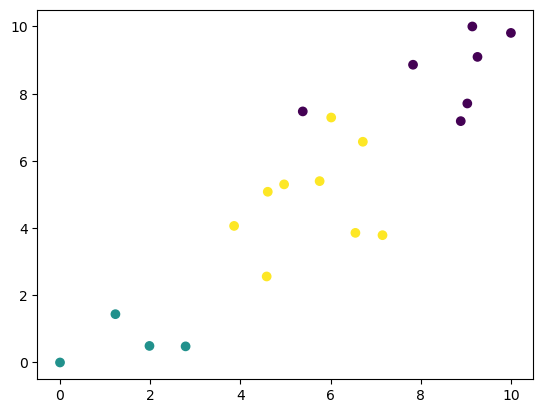

In [30]:
plt.scatter(df_notas['maths'], df_notas['science'], c=df_notas['kmeans'])
plt.show()

In [31]:
plt.scatter(df_notas['music'], df_notas['arts'], c=df_notas['kmeans'])
plt.show()

In [35]:
# lo vemos en 3D?

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_notas['music'], df_notas['arts'], df_notas['science'], c=df_notas['kmeans'])
plt.show()

## Dbscan

In [36]:
from sklearn.cluster import DBSCAN

In [42]:
dbscan = DBSCAN(eps=6, min_samples=4)
dbscan.fit(df_notas.iloc[:,:-1].values)
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [43]:
df_notas['dbscan'] = dbscan.labels_

In [45]:
plt.scatter(df_notas['maths'], df_notas['science'], c=df_notas['dbscan'])
plt.show()

In [46]:
plt.scatter(df_notas['music'], df_notas['arts'], c=df_notas['dbscan'])
plt.show()

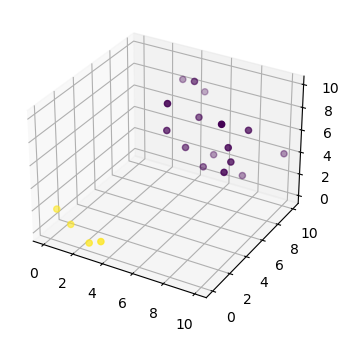

In [47]:
# lo vemos en 3D?

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_notas['music'], df_notas['arts'], df_notas['science'], c=df_notas['dbscan'])
plt.show()

### Conclusiones

Debate cual se ajusta mejor a los datos, ¿por qué?

Crea estadísticos de los clusters que hemos encontrado (medias, desviaciones, gráficos violin,...)

# Biclustering

Lo que hemos hecho: hemos encontrado agrupaciones de estudiantes con comportamiento similares. 

Ahora tenemos la siguiente pregunta: ¿cómo buscamos matchs de alumnos pudiendo dividir por asignaturas?

(podríamos plantearnos hacer un histograma en cada asignatura, estadísticos,...) -> solución más optima: BICLUSTERING 

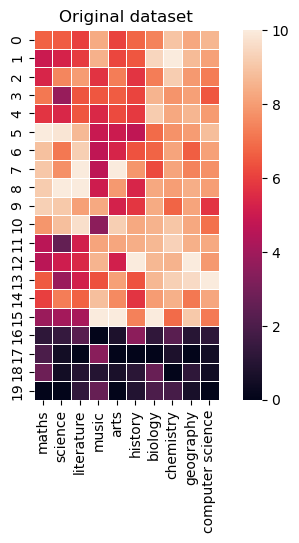

In [55]:
from matplotlib.pyplot import figure
import seaborn as sns

sns.heatmap(df_notas.iloc[:,:-2], square=True, linewidths=.5)
plt.title("Original dataset")
plt.show()

## Spectral biclustering

In [81]:
from sklearn.cluster import SpectralBiclustering

In [82]:
model = SpectralBiclustering(n_clusters=5, method="log", random_state=0)
model.fit(df_notas.iloc[:,:-2])

SpectralBiclustering(method='log', n_clusters=5, random_state=0)

In [ ]:
model.row_labels_

In [ ]:
model.column_labels_

In [ ]:
plt.scatter(df_notas['maths'], df_notas['arts'], c=model.row_labels_)
plt.show()

## Tarea

¿Qué me devuelve el algoritmo? 

- _biclusters
- column_labels_

# Pintamos los resultados

In [85]:
fit_data = df_notas.iloc[:,:-2].iloc[np.argsort(model.row_labels_),:]
fit_data = fit_data.iloc[:, np.argsort(model.column_labels_)]

plt.figure(figsize=(10,8))
sns.heatmap(fit_data, square=True, linewidths=.5)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()
plt.show()

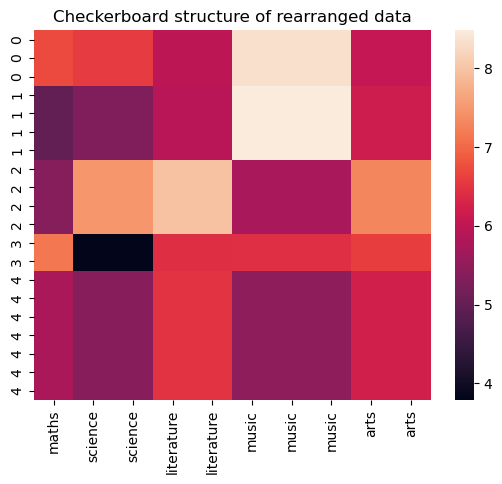

In [91]:
fit_data = df_notas.iloc[:,:-2].iloc[np.sort(model.row_labels_),:]
fit_data = fit_data.iloc[:, np.sort(model.column_labels_)]

sns.heatmap(fit_data)
plt.title("Checkerboard structure of rearranged data")
plt.show()

<Axes: >

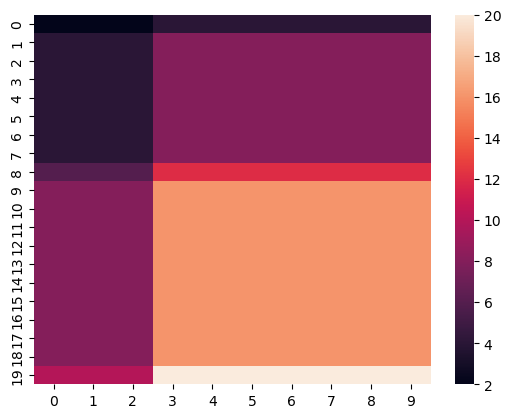

In [109]:
sns.heatmap(np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1))